In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS = 3
EPOCHES=50

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "training",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 6500 files belonging to 4 classes.


In [4]:
class_names = dataset.class_names
class_names

['Damaged', 'Old', 'Ripe', 'Unripe']

(32, 256, 256, 3)
[1 1 3 2 3 3 2 2 0 2 1 2 0 3 0 2 3 2 2 2 1 1 0 1 2 2 2 0 0 2 2 2]


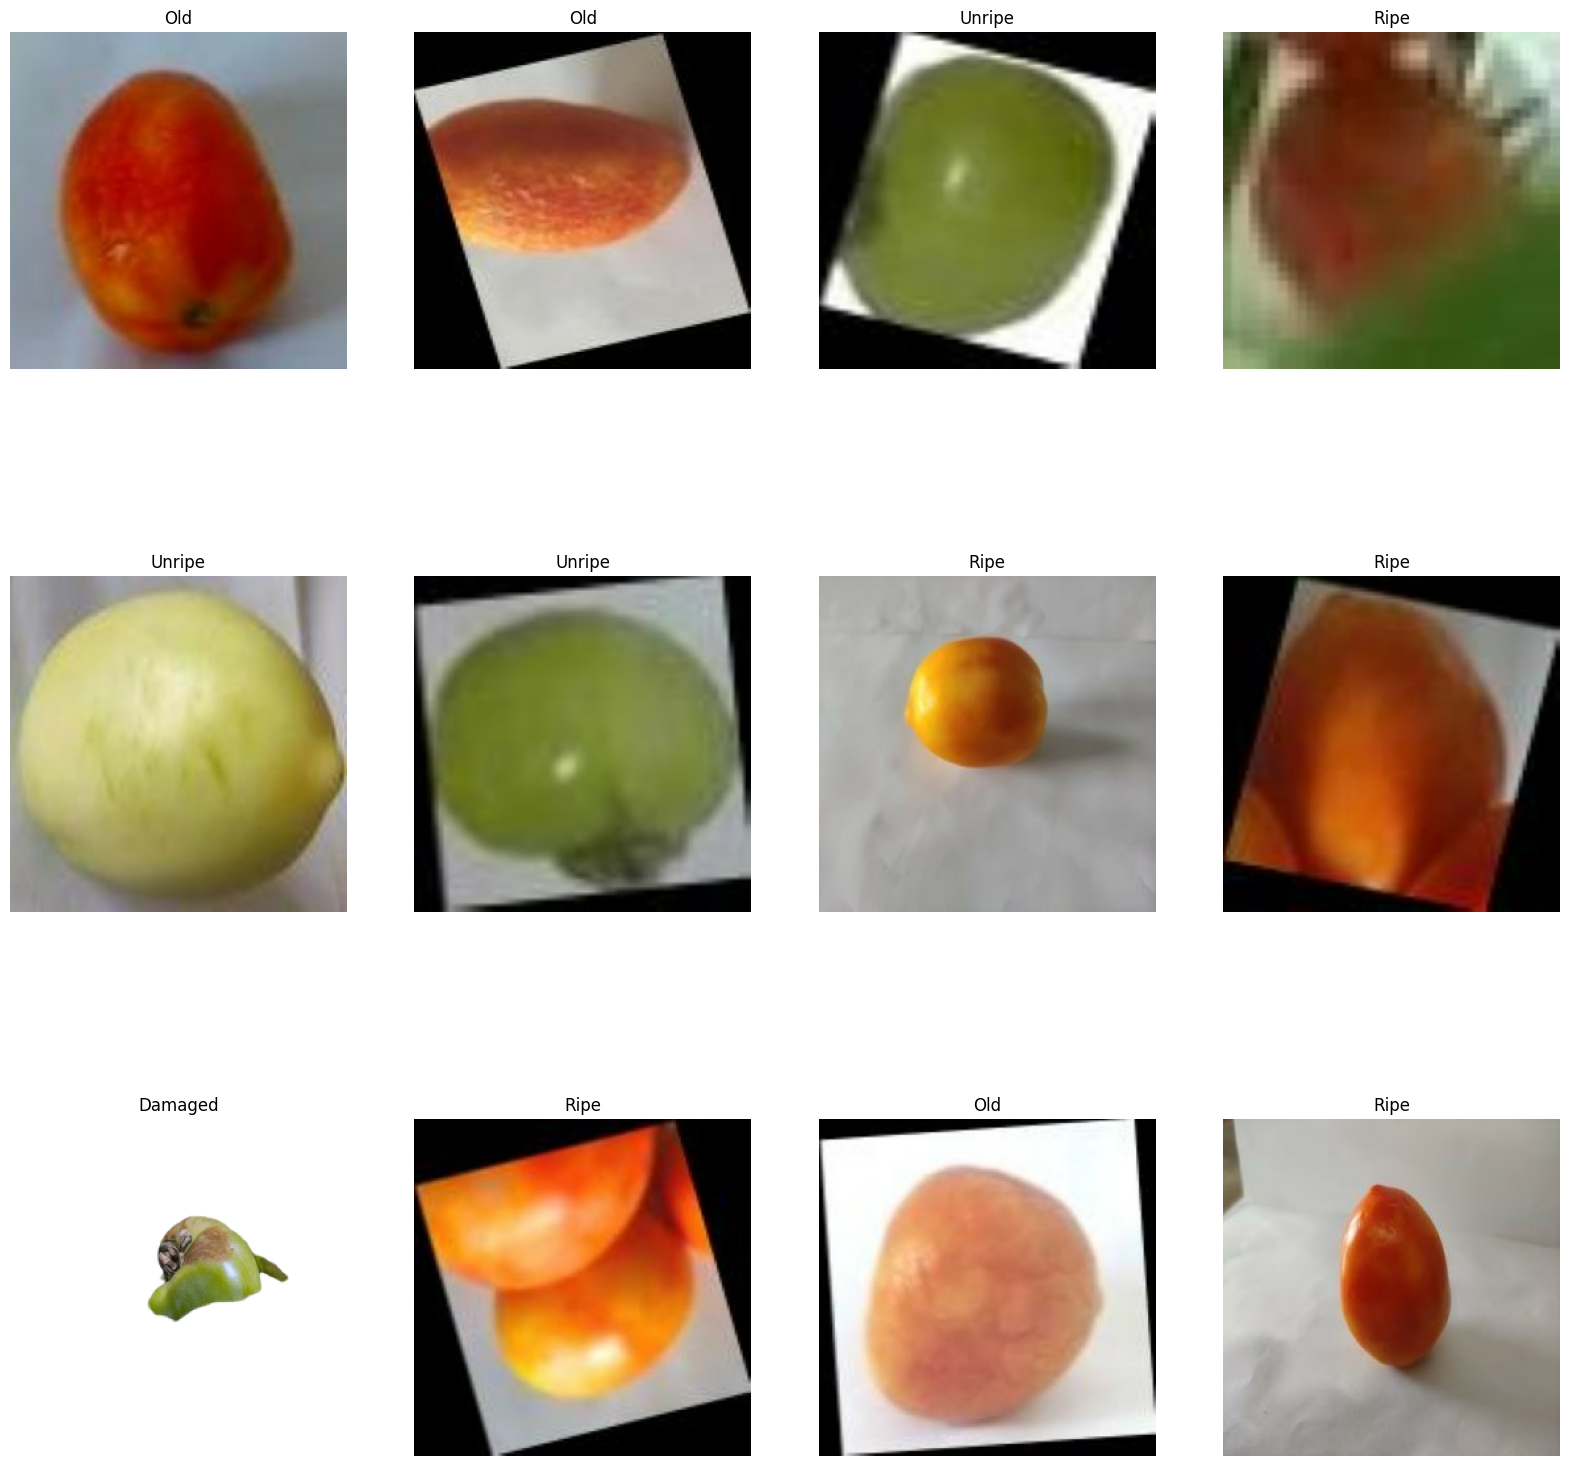

In [5]:
plt.figure(figsize=(20,20))
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [6]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert(train_split+test_split+val_split) ==1
    ds_size = len(ds)

    if shuffle:
        ds=ds.shuffle(shuffle_size, seed=12)

    train_size = int(train_split*ds_size)
    val_size = int(val_split*ds_size)

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds

In [7]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [8]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [9]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch[0].numpy()/255)

[[[0.06666667 0.         0.03921569]
  [0.06666667 0.         0.03921569]
  [0.0627451  0.         0.02745098]
  ...
  [0.00784314 0.         0.01176471]
  [0.00392157 0.         0.01960784]
  [0.00392157 0.         0.02352941]]

 [[0.05882353 0.         0.03529412]
  [0.05098039 0.         0.03529412]
  [0.05098039 0.         0.02745098]
  ...
  [0.00784314 0.         0.01176471]
  [0.00392157 0.         0.01960784]
  [0.00392157 0.         0.02352941]]

 [[0.04313726 0.00392157 0.03529412]
  [0.03137255 0.00392157 0.03137255]
  [0.03137255 0.00392157 0.03137255]
  ...
  [0.00784314 0.         0.01176471]
  [0.00392157 0.         0.01960784]
  [0.00392157 0.         0.02352941]]

 ...

 [[0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  ...
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]]

 [[0.         0.         0.        ]
  [0.         0.         0.        ]


In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Rescaling
from tensorflow.keras.layers import Resizing


resize_and_rescale = Sequential([
    Rescaling(1.0/255),
    Resizing(IMAGE_SIZE, IMAGE_SIZE)
])

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import RandomFlip
from tensorflow.keras.layers import RandomRotation


data_augmentation = Sequential([
    RandomFlip("horizontal_and_vertical"),
    RandomRotation(0.2),
])


In [12]:
input_shape = (32, IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes = 4

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, kernel_size=(3,3), activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation = 'softmax'),
])
model.build(input_shape=input_shape)

C:\Users\vddes\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [13]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (32, 254, 254, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (32, 127, 127, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (32, 125, 125, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (32, 62, 62, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (32, 60, 60, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (32, 30, 30, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (32, 28, 28, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (32, 14, 14, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (32, 12, 12, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (32, 6, 6, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (32, 4, 4, 64)         │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (32, 2, 2, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (32, 256)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (32, 64)               │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (32, 10)               │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 184,202 (719.54 KB)

 Trainable params: 184,202 (719.54 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [15]:
history = model.fit( 
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=EPOCHES

)
    

Epoch 1/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 250s 1s/step - accuracy: 0.4752 - loss: 1.2317 - val_accuracy: 0.7141 - val_loss: 0.7465
Epoch 2/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 189s 1s/step - accuracy: 0.6849 - loss: 0.7396 - val_accuracy: 0.6938 - val_loss: 0.6917
Epoch 3/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 184s 1s/step - accuracy: 0.7419 - loss: 0.6356 - val_accuracy: 0.7688 - val_loss: 0.5668
Epoch 4/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 183s 1s/step - accuracy: 0.7734 - loss: 0.5731 - val_accuracy: 0.8266 - val_loss: 0.4707
Epoch 5/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 183s 1s/step - accuracy: 0.8055 - loss: 0.4893 - val_accuracy: 0.7906 - val_loss: 0.5460
Epoch 6/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 181s 1s/step - accuracy: 0.8235 - loss: 0.4560 - val_accuracy: 0.8406 - val_loss: 0.3679
Epoch 7/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 204s 1s/step - accuracy: 0.8505 - loss: 0.3815 - val_accuracy: 0.8562 - val_loss: 0.3469
Epoch 8/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 219s 1s/step - accuracy: 0.8314 - loss: 0.4167 - val_accu

In [16]:
scores = model.evaluate(test_ds)

21/21 ━━━━━━━━━━━━━━━━━━━━ 34s 320ms/step - accuracy: 0.9661 - loss: 0.0889


In [17]:
scores


[0.10432468354701996, 0.9583333134651184]

In [18]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 163}

In [19]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [20]:
history.history['loss']

[0.9638878107070923,
 0.7291209697723389,
 0.6231868267059326,
 0.5596597790718079,
 0.47752776741981506,
 0.45994165539741516,
 0.40322908759117126,
 0.40495455265045166,
 0.3833749294281006,
 0.35726219415664673,
 0.35766729712486267,
 0.3355916440486908,
 0.31539806723594666,
 0.312007874250412,
 0.3022519648075104,
 0.29099640250205994,
 0.29242756962776184,
 0.2673300504684448,
 0.2880301773548126,
 0.2565285563468933,
 0.27153369784355164,
 0.25424960255622864,
 0.2479919046163559,
 0.23772208392620087,
 0.23247937858104706,
 0.22250792384147644,
 0.2255706787109375,
 0.23521067202091217,
 0.23201587796211243,
 0.19958442449569702,
 0.2204304039478302,
 0.22665762901306152,
 0.2278500348329544,
 0.2002493441104889,
 0.18077725172042847,
 0.18548689782619476,
 0.18772001564502716,
 0.16968019306659698,
 0.16931895911693573,
 0.1892545074224472,
 0.16481320559978485,
 0.1567099392414093,
 0.17324697971343994,
 0.17099586129188538,
 0.15560710430145264,
 0.1644166260957718,
 0.14563

In [21]:
history.history['accuracy']

[0.5771009922027588,
 0.6952582597732544,
 0.7476869821548462,
 0.7721665501594543,
 0.8118735551834106,
 0.8218966722488403,
 0.8378951549530029,
 0.8361603617668152,
 0.8496530652046204,
 0.8602544069290161,
 0.8563993573188782,
 0.8693137764930725,
 0.8776021599769592,
 0.875481903553009,
 0.8839629888534546,
 0.8835774660110474,
 0.8860832452774048,
 0.8978411555290222,
 0.8883963227272034,
 0.9036237597465515,
 0.8966846466064453,
 0.9034309983253479,
 0.9043947458267212,
 0.9101773500442505,
 0.9130685925483704,
 0.9167309403419495,
 0.913261353969574,
 0.9140323996543884,
 0.9140323996543884,
 0.9255975484848022,
 0.9182729125022888,
 0.9155744314193726,
 0.9167309403419495,
 0.922513484954834,
 0.9315728545188904,
 0.9298380613327026,
 0.9340786337852478,
 0.9363916516304016,
 0.9375481605529785,
 0.9331148862838745,
 0.9414032101631165,
 0.9412105083465576,
 0.9369699358940125,
 0.9390901923179626,
 0.9431380033493042,
 0.9400539994239807,
 0.9489206075668335,
 0.9414032101631

In [22]:
history.history['loss'][:5] # show loss for first 5 epochs


[0.9638878107070923,
 0.7291209697723389,
 0.6231868267059326,
 0.5596597790718079,
 0.47752776741981506]

In [23]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

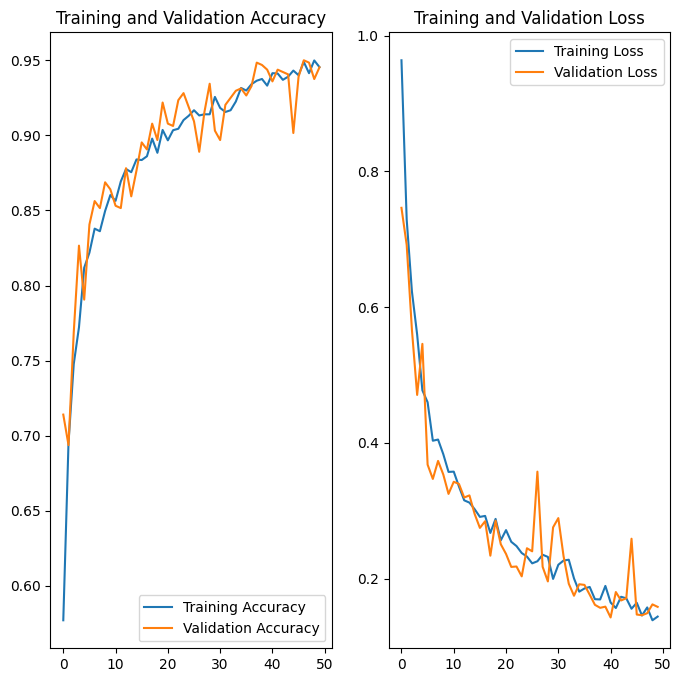

In [24]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHES), acc, label='Training Accuracy')
plt.plot(range(EPOCHES), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHES), loss, label='Training Loss')
plt.plot(range(EPOCHES), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Ripe
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 508ms/step
predicted label: Ripe


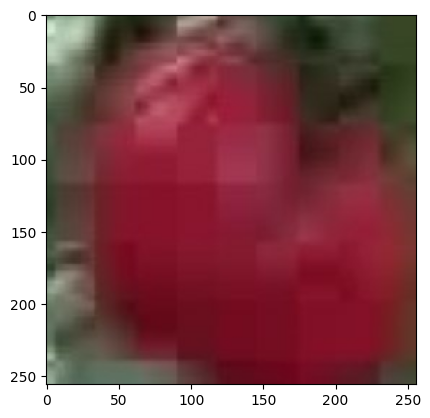

In [25]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [26]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


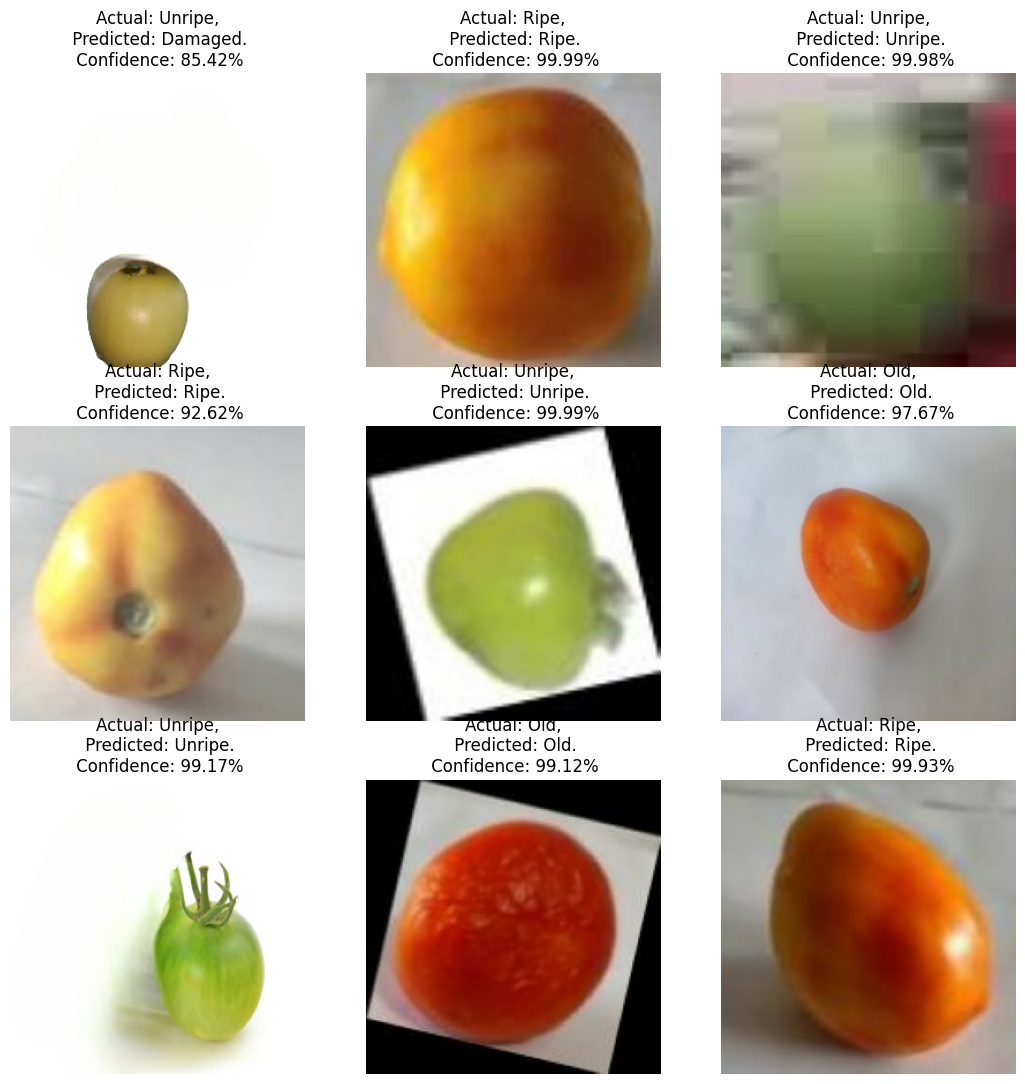

In [28]:
plt.figure(figsize=(13, 13))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")